In [52]:
%load_ext autoreload
%autoreload 2

import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '..'))
from symlie.misc.viz import plot2d

from symlie.misc.utils_results import pivot, assert_columns_same, get_and_check_Ps, stringify_dict, aggregate_dataset, plot_best, return_table, plot_pivot
from symlie.misc.wandb import update_results_df, get_inspect_df, get_inspectdev_df
from symlie.model.setup import load_P_pred

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
df = get_inspectdev_df(tags = ['noise1d-loss'])

lw_o, lw_dg = 'lossweight_o', 'lossweight_dg'

Retreiving wandb yu8qw0e3: 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]


In [77]:
losses = ['test_loss', 'test_loss_o', 'test_loss_dg']
d = df[[lw_o, lw_dg] + losses].copy()

In [78]:
d = d.set_index([lw_o, lw_dg])
d = d.drop([(0, 0)])
d

test_loss  test_loss_o  test_loss_dg
lossweight_o lossweight_dg                                         
10.0         1.0            1.552878e+00     0.000165      1.551226
             0.0            2.747362e-05     0.000003      1.550495
             10.0           1.552448e+01     0.000964      1.551484
             0.1            1.552547e-01     0.000020      1.550533
1.0          10.0           1.553561e+01     0.001938      1.553367
             0.1            1.552879e-01     0.000165      1.551227
0.0          10.0           1.554499e+01     0.002355      1.554499
1.0          0.0            2.700218e-06     0.000003      1.550482
             1.0            1.552456e+00     0.000964      1.551492
0.0          1.0            1.554500e+00     0.002355      1.554500
0.1          0.0            2.456977e-07     0.000002      1.550452
             0.1            1.552446e-01     0.000964      1.551483
0.0          0.1            1.554502e-01     0.002355      1.554501
0.1          10.0           1.554402e+01     0.002299      1.554380
             1.0            1.553571e+00     0.001938      1.553378

In [83]:
d.reorder_levels([lw_o, lw_dg]).sort_index()

test_loss  test_loss_o  test_loss_dg
lossweight_o lossweight_dg                                         
0.0          0.1            1.554502e-01     0.002355      1.554501
             1.0            1.554500e+00     0.002355      1.554500
             10.0           1.554499e+01     0.002355      1.554499
0.1          0.0            2.456977e-07     0.000002      1.550452
             0.1            1.552446e-01     0.000964      1.551483
             1.0            1.553571e+00     0.001938      1.553378
             10.0           1.554402e+01     0.002299      1.554380
1.0          0.0            2.700218e-06     0.000003      1.550482
             0.1            1.552879e-01     0.000165      1.551227
             1.0            1.552456e+00     0.000964      1.551492
             10.0           1.553561e+01     0.001938      1.553367
10.0         0.0            2.747362e-05     0.000003      1.550495
             0.1            1.552547e-01     0.000020      1.550533
             1.0            1.552878e+00     0.000165      1.551226
             10.0           1.552448e+01     0.000964      1.551484

In [79]:
d_pivots = {loss: d.pivot_table(index=[lw_o], columns=[lw_dg], values=loss, aggfunc='mean') for loss in losses}

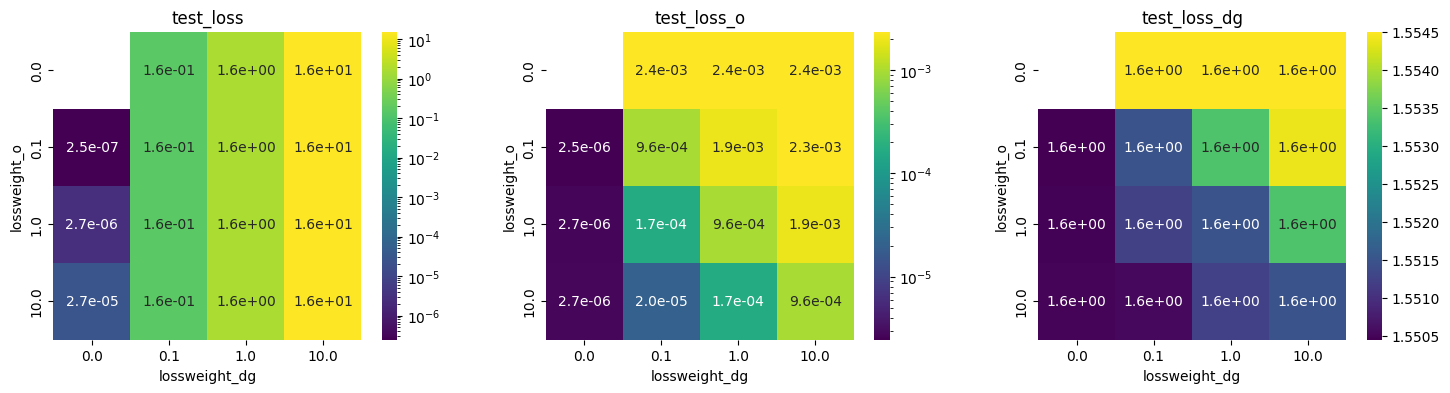

In [86]:
n_plots = len(d_pivots)

fig, axs = plt.subplots(1, n_plots, figsize=(6*n_plots, 4))
for i, (loss, d_pivot) in enumerate(d_pivots.items()):
    # plot_pivot(d_pivot, ax=ax[i], title=loss)
    ax = axs[i]

    norm = LogNorm() if loss != 'test_loss_dg' else None
    sns.heatmap(d_pivot, annot=True, fmt=".1e", cmap='viridis', ax = ax, square=True, norm=norm)
    ax.set_title(loss)
plt.show()